In [ ]:
from dataset import MiniImagenetDataset
from network import SiameseNetwork
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch


## Test and Visualization for Mini Imagenet Dataset
1. load dataset and model

In [33]:
dataset = MiniImagenetDataset("../Dataset/imagenet-mini/train", k=1, n=5)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
model = SiameseNetwork()
checkpoint = torch.load("./checkpoints/best.pth")
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()



C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\albumentations\core\validation.py:58: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
c:\Users\Admin\anaconda3\envs\cspg\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\cspg\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17588\4066857690.py:4: FutureWarning: You are using `torch.

SiameseNetwork(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

2. inference random two images and visualize with similarity prediction (re-run this cell to see another inference result)

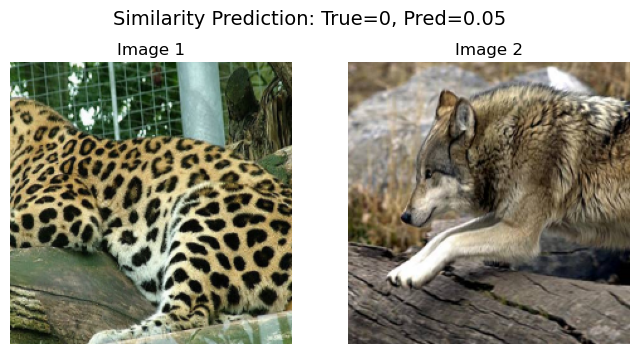

In [154]:

img1, img2, y = next(iter(dataloader))
y_pred = model(img1,img2)
img1_np = img1[0].permute(1, 2, 0).cpu().numpy() 
img2_np = img2[0].permute(1, 2, 0).cpu().numpy()  

if img1_np.max() <= 1.0:
    img1_np = (img1_np * 255).astype("uint8")
    img2_np = (img2_np * 255).astype("uint8")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img1_np)
axes[0].set_title("Image 1")
axes[0].axis("off")

axes[1].imshow(img2_np)
axes[1].set_title("Image 2")
axes[1].axis("off")

plt.suptitle(f"Similarity Prediction: True={y.item()}, Pred={y_pred.item():.2f}", fontsize=14)
plt.show()